In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

COLUMN_NAMES = [
    'acc_chest_x', 'acc_chest_y', 'acc_chest_z',    # 0-2 (Chest Acc)
    'ecg_1', 'ecg_2',                               # 3-4 (ECG)
    'acc_ankle_x', 'acc_ankle_y', 'acc_ankle_z',    # 5-7 (Ankle Acc)
    'gyro_ankle_x', 'gyro_ankle_y', 'gyro_ankle_z', # 8-10 (Ankle Gyro)
    'mag_ankle_x', 'mag_ankle_y', 'mag_ankle_z',    # 11-13 (Ankle Mag)
    'acc_arm_x', 'acc_arm_y', 'acc_arm_z',          # 14-16 (Arm Acc)
    'gyro_arm_x', 'gyro_arm_y', 'gyro_arm_z',       # 17-19 (Arm Gyro)
    'mag_arm_x', 'mag_arm_y', 'mag_arm_z',          # 20-22 (Arm Mag)
    'activity_id'                                   # 23 (Label)
]

target_activities = {
    4: 'Walking',                   # 비교군 1 (동작의 구분감)
    6: 'Waist bends forward',       # 후보 1
    7: 'Frontal elevation of arms', # 후보 2
    8: 'Knees bending',             # 후보 3
    9: 'Cycling',                   # 비교군 2 (동작 속도의 적합성)
    12: 'Jump front & back'         # 비교군 3 (단축 동작)
}

def load_mhealth_dataset(data_dir='./'):
    full_dataset = {}

    file_list = sorted(glob.glob(os.path.join(data_dir, "mHealth_subject*.log")))

    if not file_list:
        print(f"Error: No files found in directory '{data_dir}'. Check the path and file names.")
        return {}

    for file_path in file_list:
        file_name = os.path.basename(file_path)
        subj_id = file_name.split('.')[0].replace('_', '')

        df = pd.read_csv(file_path, sep="\t", header=None)
        if df.shape[1] == len(COLUMN_NAMES):
            df.columns = COLUMN_NAMES
        else:
            print(f"Warning: {subj_id} has {df.shape[1]} columns, expected {len(COLUMN_NAMES)}.")

        subj_data = {}

        for label_code, activity_name in target_activities.items():
            activity_df = df[df['activity_id'] == label_code].copy()

            if not activity_df.empty:
                subj_data[activity_name] = activity_df.drop(columns=['activity_id'])

        full_dataset[subj_id] = subj_data

    print(f"\nSuccessfully loaded data for {len(full_dataset)} subjects.")
    return full_dataset

data_directory = '/content/drive/MyDrive/Colab Notebooks/HAR_data/MHEALTHDATASET'
mhealth_data = load_mhealth_dataset(data_directory)


Successfully loaded data for 10 subjects.


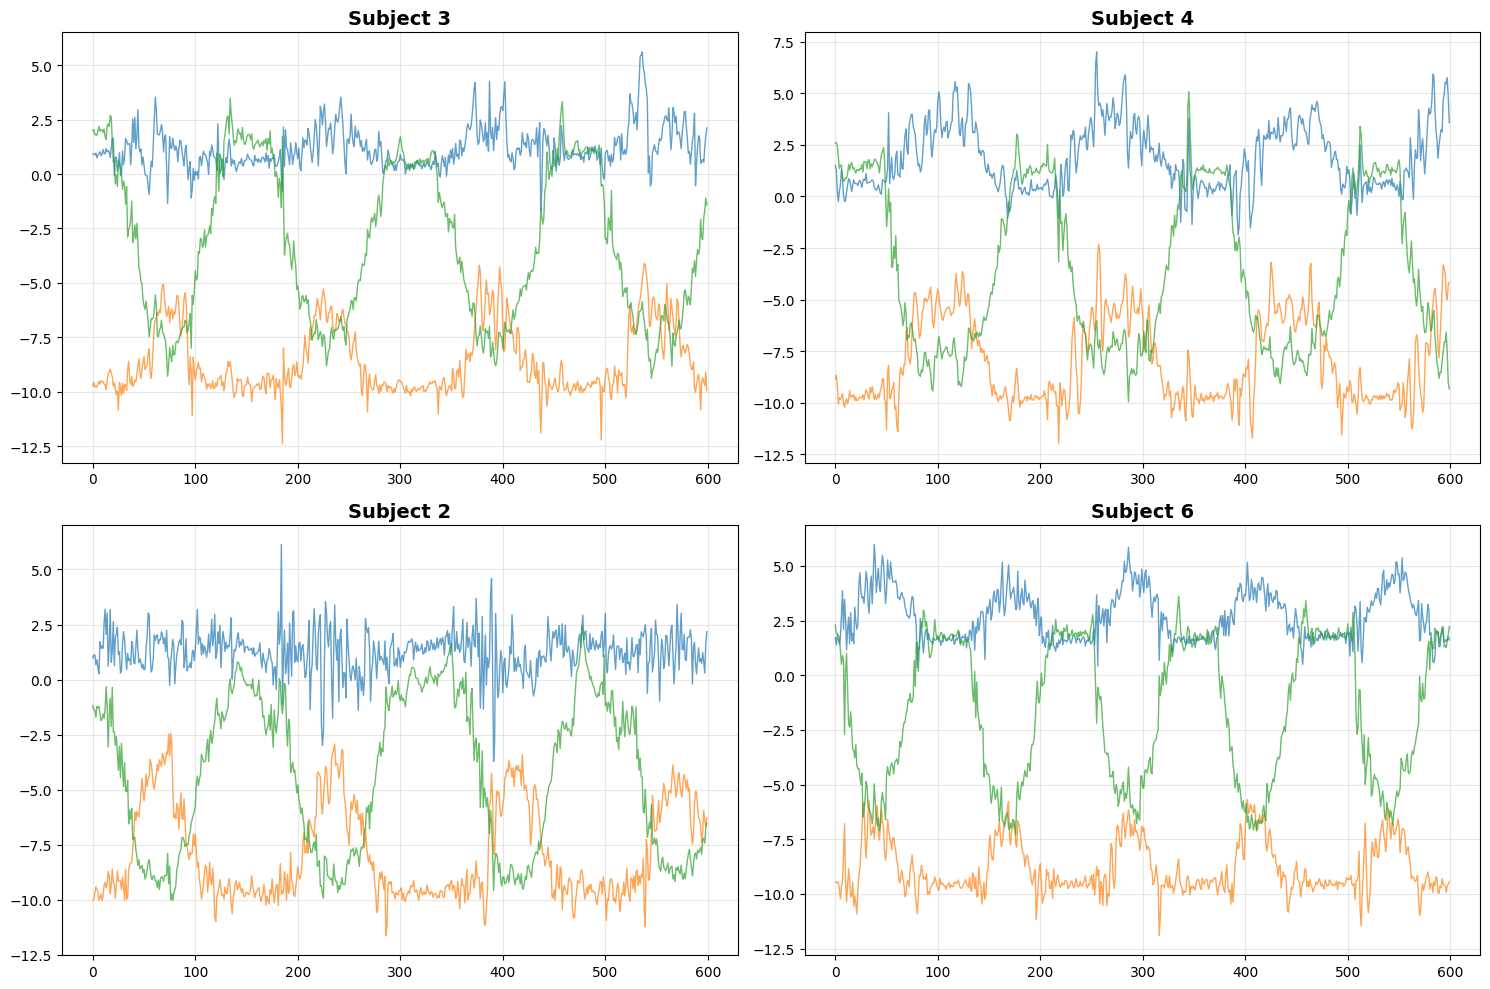

In [7]:
prof_picks = [3, 4]

mdi_picks = [2, 6]

targets = prof_picks + mdi_picks
target_act = 'Knees bending'

plt.figure(figsize=(15, 10))

for i, subj_id in enumerate(targets):
    full_id = f'mHealthsubject{subj_id}'

    if full_id not in mhealth_data or target_act not in mhealth_data[full_id]:
        print(f"Data missing for {full_id}")
        continue

    df = mhealth_data[full_id][target_act]

    # 1. 가속도 데이터 추출 (발목 센서 기준)
    acc_cols = ['acc_ankle_x', 'acc_ankle_y', 'acc_ankle_z']
    data = df[acc_cols].values

    # 2. 벡터 크기(Magnitude) 계산 -> 이게 '에너지/분산'의 원천
    vm = np.linalg.norm(data, axis=1)

    # 그래프 그리기 (앞부분 500개 샘플만 확대해서 자세히 보기)
    # 전체를 그리면 뭉쳐서 안보임. 디테일(떨림)을 봐야함.
    sample_len = 600
    if len(vm) < sample_len: sample_len = len(vm)

    plt.subplot(2, 2, i+1)

    # 원본 3축 데이터 (연하게)
    plt.plot(data[:sample_len], alpha=0.7, linewidth=1)

    plt.title(f"Subject {subj_id}", fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Y축 범위를 통일하지 않고 개별로
    # (진폭의 절대 크기 차이와 파형의 모양을 각각 확인하기 위함)

plt.tight_layout()
plt.show()

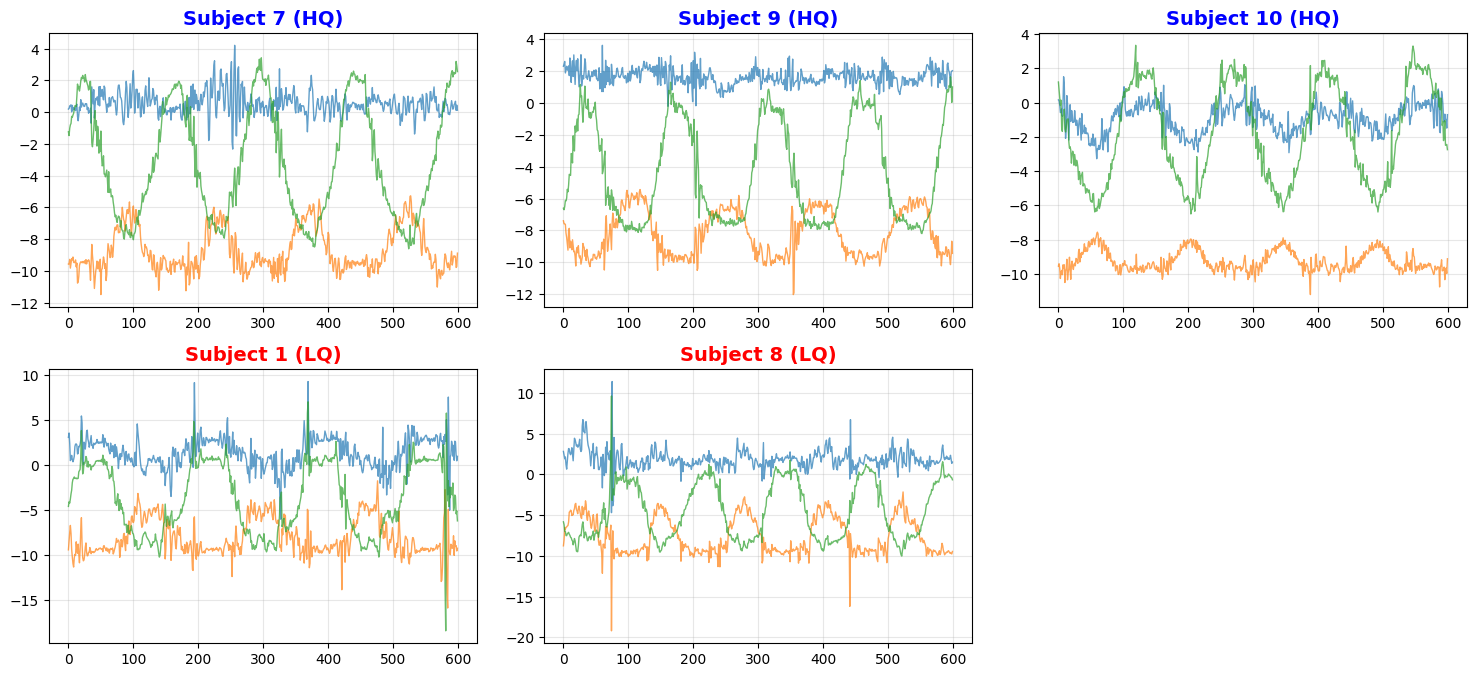

In [15]:
HQ_picks = [7, 9, 10]

LQ_picks = [1, 8]

targets = HQ_picks + LQ_picks
target_act = 'Knees bending'

plt.figure(figsize=(15, 10))

for i, subj_id in enumerate(targets):
    full_id = f'mHealthsubject{subj_id}'

    if full_id not in mhealth_data or target_act not in mhealth_data[full_id]:
        print(f"Data missing for {full_id}")
        continue

    df = mhealth_data[full_id][target_act]

    # 1. 가속도 데이터 추출 (발목 센서 기준)
    acc_cols = ['acc_ankle_x', 'acc_ankle_y', 'acc_ankle_z']
    data = df[acc_cols].values

    # 2. 벡터 크기(Magnitude) 계산 -> 이게 '에너지/분산'의 원천
    vm = np.linalg.norm(data, axis=1)

    # 그래프 그리기 (앞부분 500개 샘플만 확대해서 자세히 보기)
    # 전체를 그리면 뭉쳐서 안보임. 디테일(떨림)을 봐야함.
    sample_len = 600
    if len(vm) < sample_len: sample_len = len(vm)

    plt.subplot(3, 3, i+1)

    # 원본 3축 데이터 (연하게)
    plt.plot(data[:sample_len], alpha=0.7, linewidth=1)

    if subj_id in HQ_picks:
        plt.title(f"Subject {subj_id} (HQ)", fontsize=14, fontweight='bold', color='blue')
    else:
        plt.title(f"Subject {subj_id} (LQ)", fontsize=14, fontweight='bold', color='red')

    plt.grid(True, alpha=0.3)

    # Y축 범위를 통일하지 않고 개별로
    # (진폭의 절대 크기 차이와 파형의 모양을 각각 확인하기 위함)

plt.tight_layout()
plt.show()